Aprendizado de maquina - Detecção de fraude  
Eloisa Medeiros - Curso extensão 02/08/2024

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Definir número de amostras
total_samples = 10000
fraud_ratio = 0.05  # 5% de fraudes
fraud_samples = int(total_samples * fraud_ratio)
normal_samples = total_samples - fraud_samples

In [ ]:
# Gerar dados sintéticos com make_classification
X, y = make_classification(n_samples=total_samples, n_features=5, weights=[0.95, 0.05], random_state=42)

In [ ]:
# Criar DataFrame
df = pd.DataFrame(X, columns=['valor_transacao', 'latitude', 'longitude', 'historico_usuario', 'horario_compra'])
df['fraude'] = y  # Rótulo de fraude

In [ ]:
def ajustar_valores(df):
    df['valor_transacao'] = np.abs(df['valor_transacao']) * 1000  # Converter para valores positivos
    df['latitude'] = np.round(np.random.uniform(-90, 90, total_samples), 6)
    df['longitude'] = np.round(np.random.uniform(-180, 180, total_samples), 6)
    df['historico_usuario'] = np.random.randint(1, 50, total_samples)  # Número de transações anteriores
    df['horario_compra'] = np.random.randint(0, 24, total_samples)  # Horário do dia
    return df

In [ ]:
df.head()

,valor_transacao,latitude,longitude,historico_usuario,horario_compra,fraude
0,-2.244569,-1.362328,1.554333,-2.086909,-1.277605,0
1,-0.741786,0.204282,1.681893,-2.608295,1.980196,0
2,-1.817423,-1.437839,0.661023,-0.708437,0.727114,0
3,-1.122643,0.106464,2.183630,-3.353276,-0.719814,0
4,-0.018329,1.014871,1.843978,-3.024641,-0.478505,0


In [ ]:
# Pré-processamento
df.fillna(df.mean(), inplace=True)  # Lidar com valores nulos
scaler = StandardScaler()
df[['valor_transacao', 'historico_usuario', 'horario_compra']] = scaler.fit_transform(df[['valor_transacao', 'historico_usuario', 'horario_compra']])

In [ ]:
# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fraude']), df['fraude'], test_size=0.3, random_state=42)

In [ ]:
# Escolher modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Analise de features que estão correlacionados - recursos adicionados

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

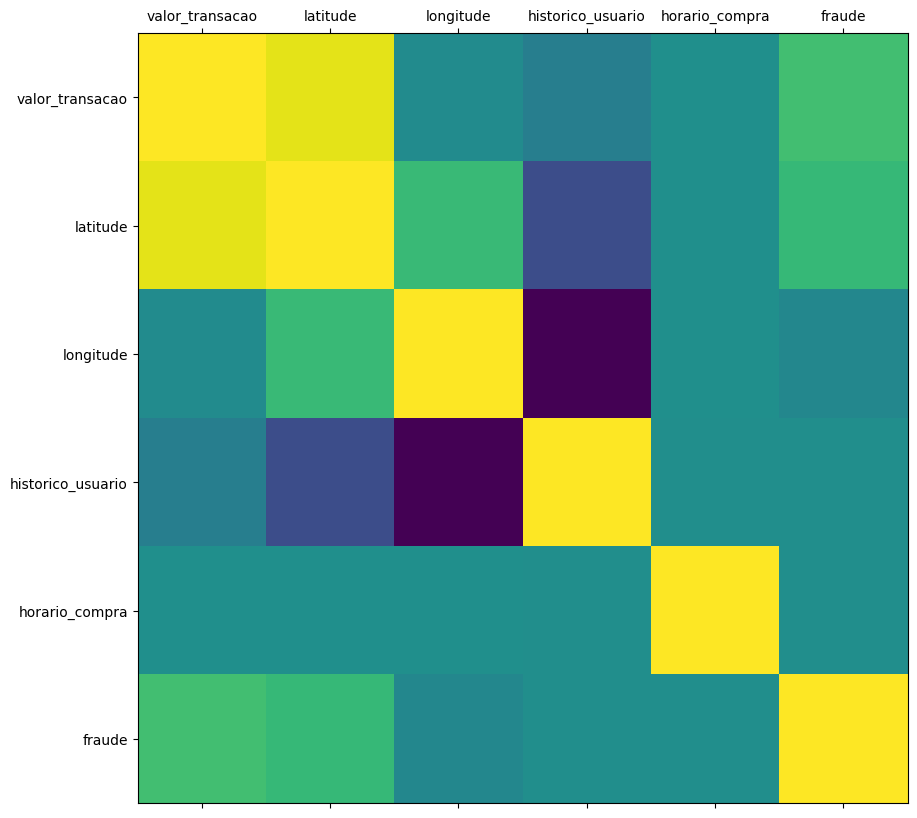

In [ ]:
# Criando o gráfico -
# Convertendo dados para dataframe pandas - cores proximas a amarelo indica correlação forte
plot_corr(df)

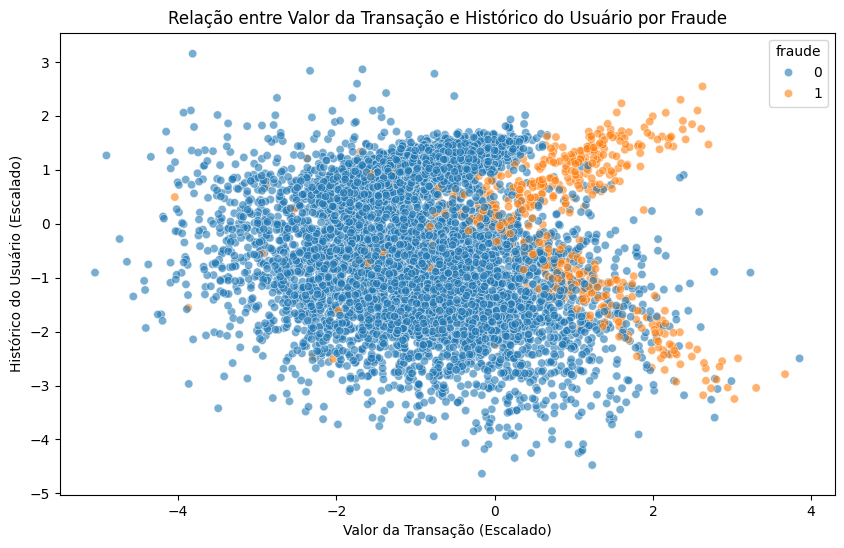

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='valor_transacao', y='historico_usuario', hue='fraude', alpha=0.6)
plt.title('Relação entre Valor da Transação e Histórico do Usuário por Fraude')
plt.xlabel('Valor da Transação (Escalado)')
plt.ylabel('Histórico do Usuário (Escalado)')
plt.show()

In [ ]:
# Avaliação
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2843
           1       0.00      0.00      0.00       157

    accuracy                           0.95      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.90      0.95      0.92      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Sim, o modelo teve um bom desempenho para identificar transações legítimas, com uma precisão de 0,95 para a classe "0"
# (não fraude). Porém, ele teve dificuldades para identificar as fraudes (classe "1"),
# com precisão de 0,00 e recall de 0,00, o que significa que ele não conseguiu identificar nenhuma fraude corretamente.
# Isso é comum quando temos um desequilíbrio de classes, ou seja, a quantidade de fraudes no dataset é muito menor do que as transações legítimas,
# o que faz com que o modelo acabe "ignorando" as fraudes, já que ele tende a se concentrar mais na classe majoritária.

# Isso pode ser melhorado com algumas técnicas, como balancear as classes ou ajustar o limiar de decisão, para que o modelo consiga dar mais
# atenção às fraudes.

In [ ]:
import joblib

In [ ]:
joblib.dump(modelo, 'modelo_fraude.pkl')
print('modelo salvo em modelo_fraude.pkl')

modelo salvo em modelo_fraude.pkl
